IMPORTATION OF REQUIRED LIBRARIES

In [129]:


import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os 
import snowflake.connector
import seaborn as sns



load_dotenv()



ESTABLISHING CONNECTION TO SNOWFLAKE WAREHOUSE TO GET DATA

In [130]:


SNOWFLAKE_ACCOUNT = os.getenv("SNOWFLAKE_ACCOUNT")
SNOWFLAKE_USER = os.getenv("SNOWFLAKE_USER")
SNOWFLAKE_PASSWORD = os.getenv("SNOWFLAKE_PASSWORD")
SNOWFLAKE_ROLE = os.getenv("SNOWFLAKE_ROLE")
SNOWFLAKE_WAREHOUSE = os.getenv("SNOWFLAKE_WAREHOUSE")
SNOWFLAKE_DATABASE = os.getenv("SNOWFLAKE_DATABASE")
SNOWFLAKE_SCHEMA = os.getenv("SNOWFLAKE_SCHEMA")

# Snowflake connection parameters
conn_params = {
    'user': SNOWFLAKE_USER ,
    'password': SNOWFLAKE_PASSWORD,
    'account': SNOWFLAKE_ACCOUNT,
    'warehouse': SNOWFLAKE_WAREHOUSE,
    'database': SNOWFLAKE_DATABASE,
    'schema': SNOWFLAKE_SCHEMA,
    'role': SNOWFLAKE_ROLE
}

# Establish connection
conn = snowflake.connector.connect(**conn_params)

# Query to fetch 5-day forecast data
query = """
SELECT 
   *
FROM 
    FORECAST
"""

# Fetch data into a pandas DataFrame
data = pd.read_sql(query, conn)

# Close the connection
conn.close()



DESCRIPTIVE STATISTICS OF WEATHER FORECAST DATA

In [131]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.describe()


,DATE,TEMPERATURE,FEELS_LIKE,PRESSURE,HUMIDITY,WINDSPEED,WIND_DIRECTION,CLOUDINESS,PRECIPITATION
count,40,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000
mean,2024-06-04 04:30:00,14.940500,14.214500,1019.450000,66.65000,3.204750,248.300000,66.075000,0.042000
min,2024-06-01 18:00:00,9.370000,7.790000,1011.000000,35.00000,0.650000,3.000000,2.000000,0.000000
25%,2024-06-02 23:15:00,12.962500,12.222500,1015.000000,52.75000,2.167500,259.750000,42.250000,0.000000
50%,2024-06-04 04:30:00,15.050000,14.400000,1019.000000,68.50000,3.350000,284.000000,80.500000,0.000000
75%,2024-06-05 09:45:00,17.685000,16.827500,1024.250000,74.25000,3.990000,304.000000,99.000000,0.000000
max,2024-06-06 15:00:00,20.160000,19.620000,1028.000000,97.00000,6.100000,358.000000,100.000000,0.420000
std,NaN,3.121646,3.291916,5.227884,15.98164,1.282651,105.440274,34.916301,0.099465


TEPERATURE AND FEELS LIKE TRENDS OVER THE FIVE DAY PERIOD

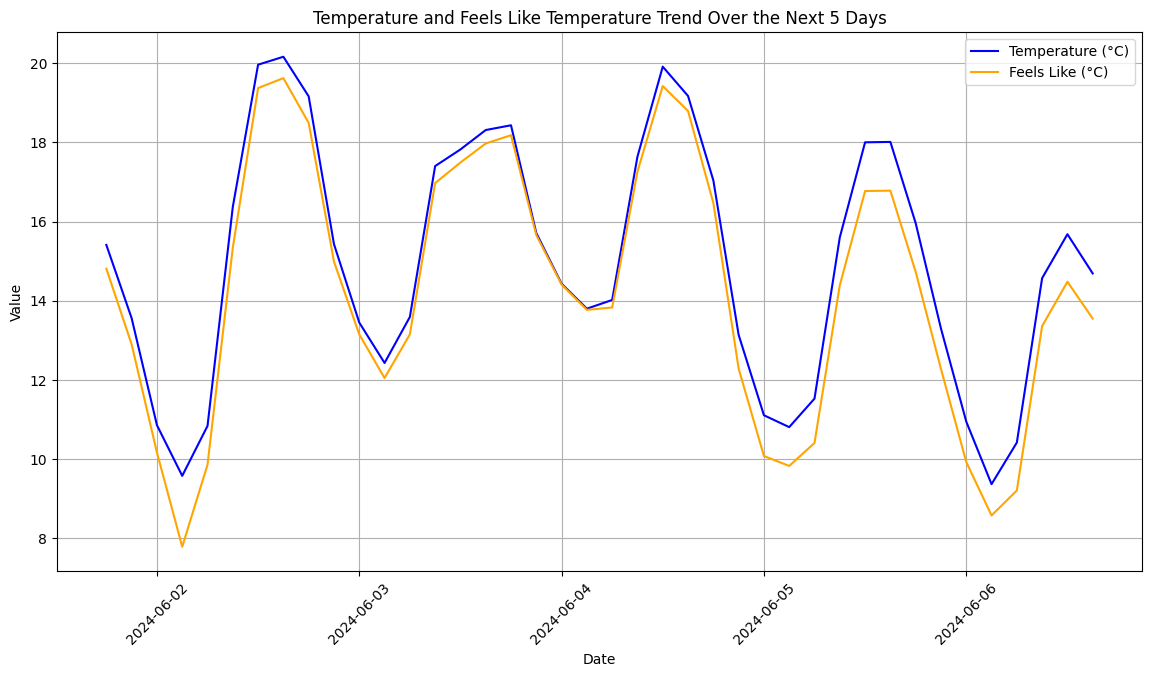

In [122]:
# Plot Temperature and Feels Like Temperature
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['TEMPERATURE'], label='Temperature (°C)', color='blue', linestyle='-')
plt.plot(data['DATE'], data['FEELS_LIKE'], label='Feels Like (°C)', color='orange', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Temperature and Feels Like Temperature Trend Over the Next 5 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

HUMIDITY AND CLOUDINESS TRENDS OVER THE FIVE DAY PERIOD

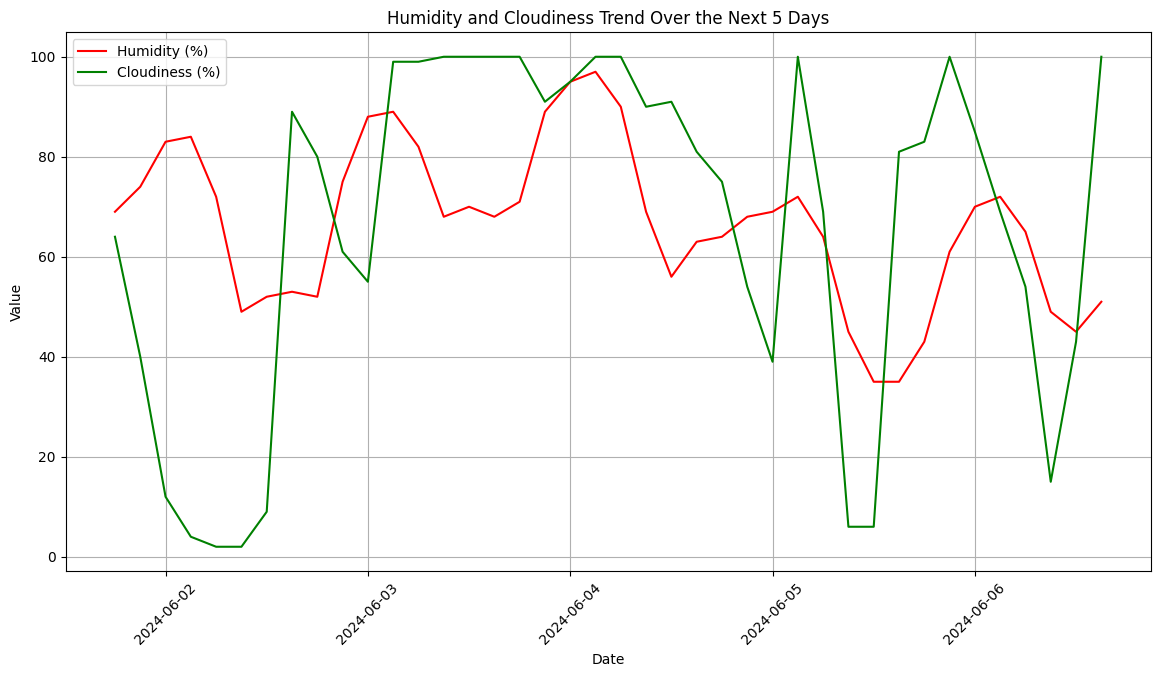

In [109]:
# Plot Humidity and Cloudiness
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['HUMIDITY'], label='Humidity (%)', color='red', linestyle='-')
plt.plot(data['DATE'], data['CLOUDINESS'], label='Cloudiness (%)', color='green', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Humidity and Cloudiness Trend Over the Next 5 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


WIND SPEED AND PRECIPITATION TRENDS OVER THE FIVE DAY PERIOD

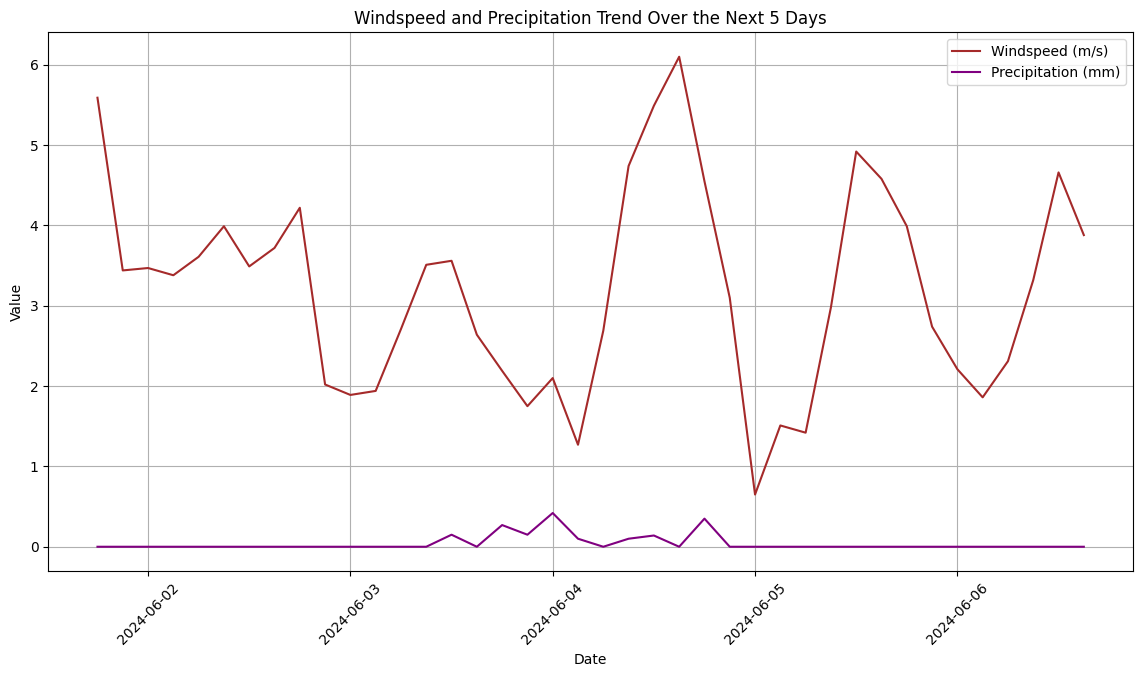

In [110]:
# Plot Windspeed and Precipitation
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['WINDSPEED'], label='Windspeed (m/s)', color='brown', linestyle='-')
plt.plot(data['DATE'], data['PRECIPITATION'], label='Precipitation (mm)', color='purple', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Windspeed and Precipitation Trend Over the Next 5 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

PRESSURE TRENDS OVER THE FIVE DAY PERIOD

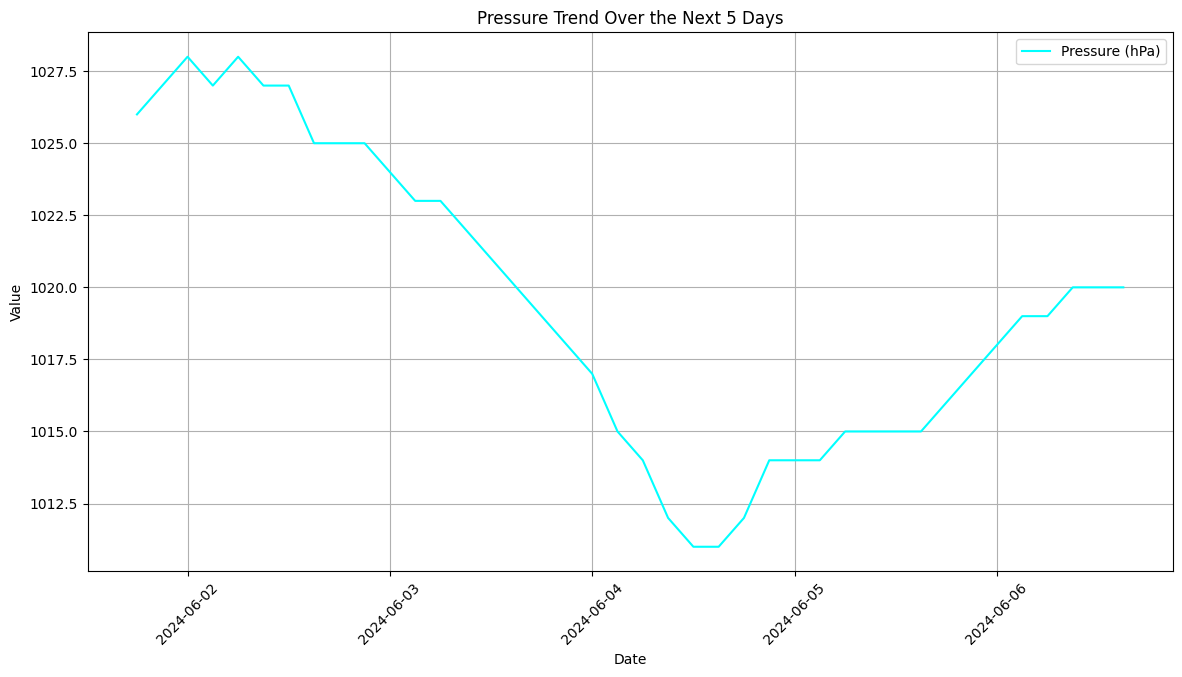

In [111]:
# Plot Pressure
plt.figure(figsize=(14, 7))
plt.plot(data['DATE'], data['PRESSURE'], label='Pressure (hPa)', color='cyan', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Pressure Trend Over the Next 5 Days')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

FREQUENCY OF ALL WEATHER CONDITION DESCRIPTIONS

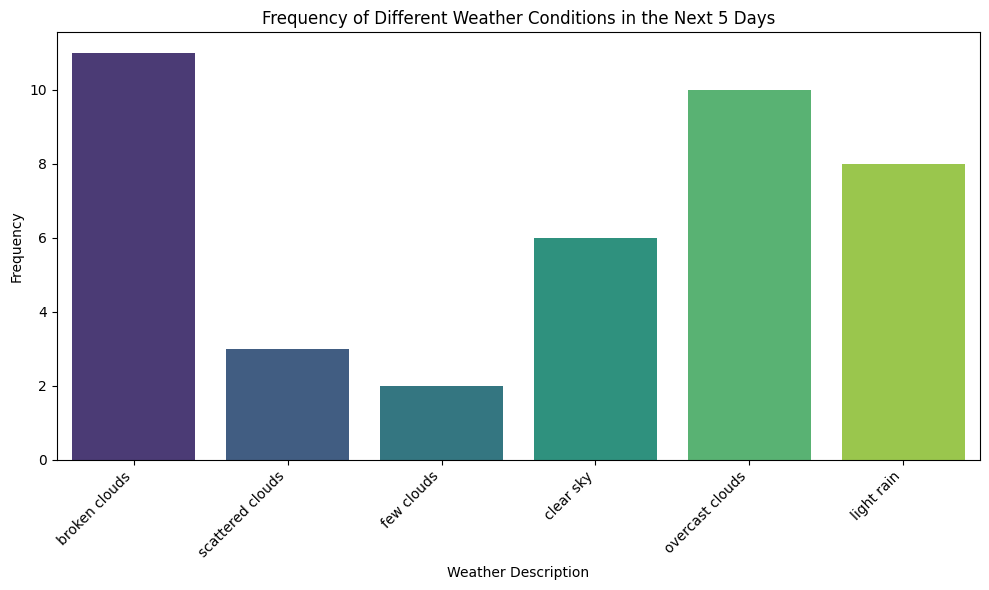

In [126]:
#frequency of different weather conditions


plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='DESCRIPTION', palette='viridis')
plt.xlabel('Weather Description')
plt.ylabel('Frequency')
plt.title('Frequency of Different Weather Conditions in the Next 5 Days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



CORRELATION HEATMAP OF NUMERIC DATA FIELDS

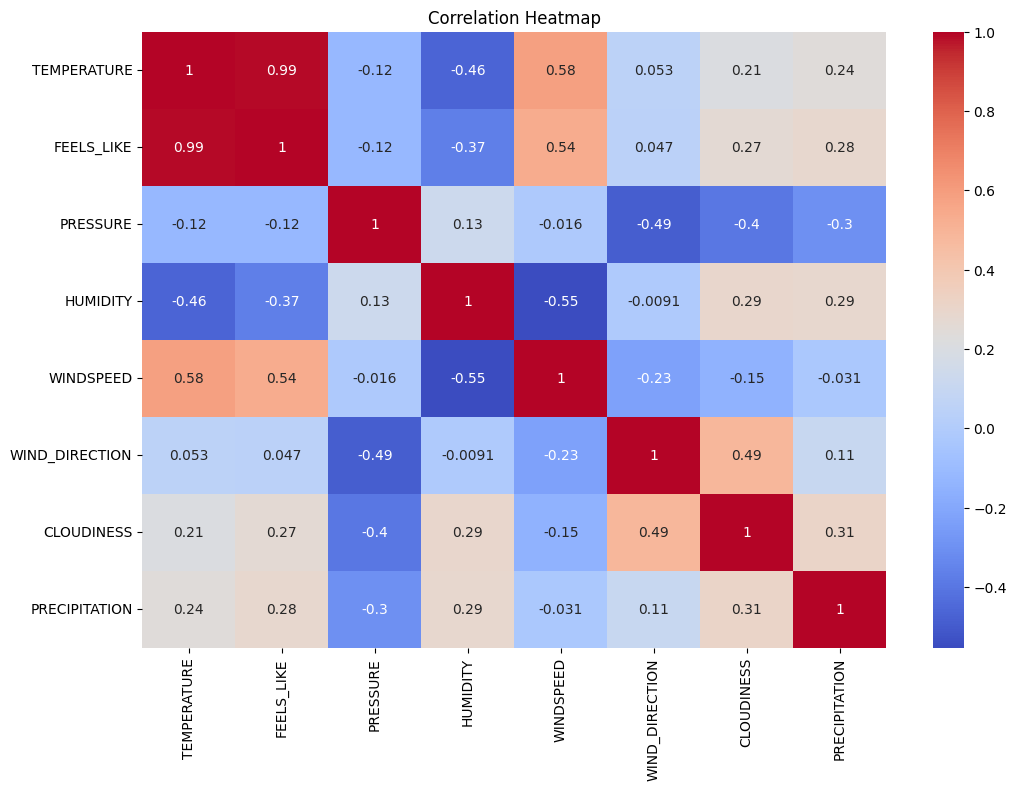

In [113]:
#correlation heatmap
numeric_data = data[['TEMPERATURE','FEELS_LIKE','PRESSURE','HUMIDITY','WINDSPEED','WIND_DIRECTION','CLOUDINESS','PRECIPITATION']]
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


COMPARING TEMPERATURE AND HUMIDITY

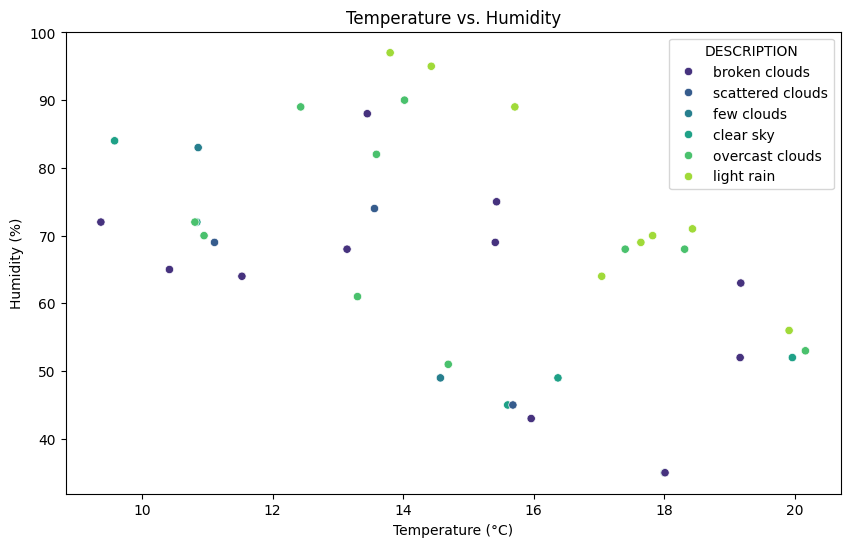

In [114]:
#Temperature vs humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='TEMPERATURE', y='HUMIDITY', hue='DESCRIPTION', palette='viridis')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity')
plt.show()


DISTRIBUTION OF WIND SPEED OVER THE FIVE DAYS PERIOD

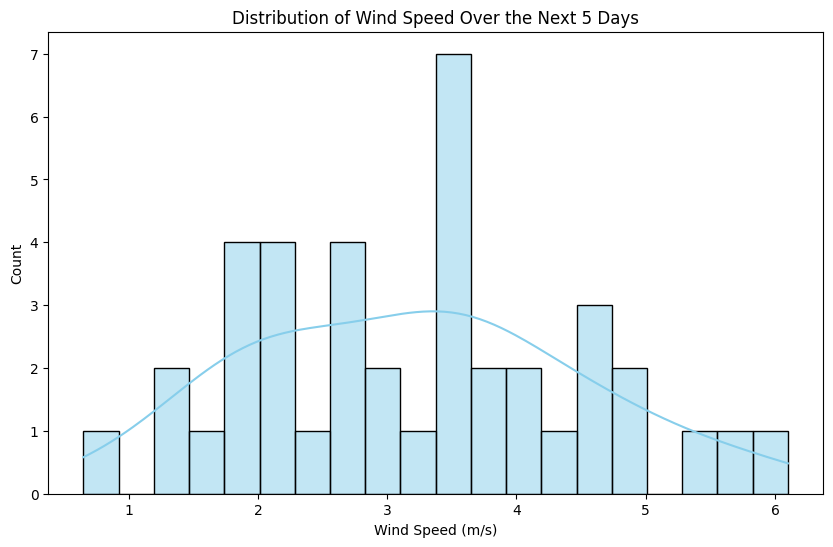

In [115]:
# Wind Speed Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['WINDSPEED'], bins=20, kde=True, color='skyblue')
plt.xlabel('Wind Speed (m/s)')
plt.title('Distribution of Wind Speed Over the Next 5 Days')
plt.show()


AVERAGE DAILY TEMPERATURE OVER THE FIIVE DAYS PERIOD

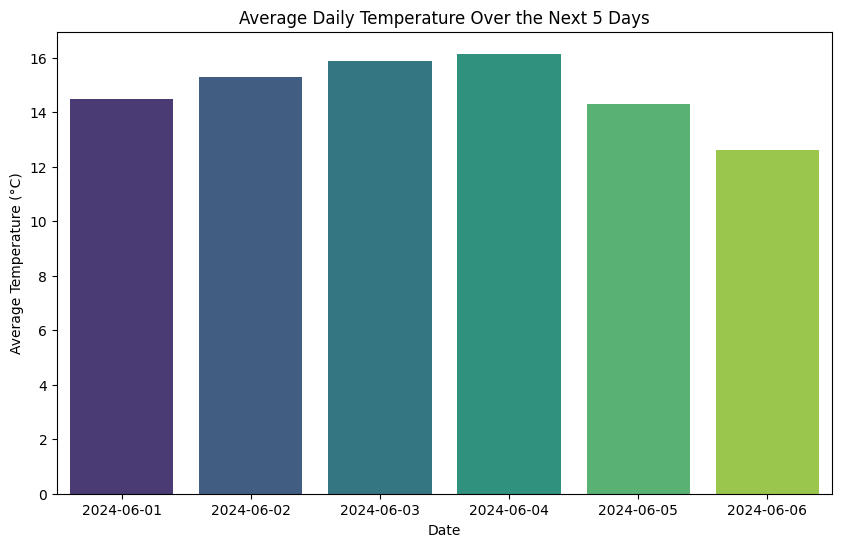

In [127]:
#Average daily Temperature

data['DATE'] = pd.to_datetime(data['DATE'])
data['DATE'] = data['DATE'].dt.date
daily_avg_temp = data.groupby('DATE')['TEMPERATURE'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=daily_avg_temp, x='DATE', y='TEMPERATURE', palette='viridis')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Daily Temperature Over the Next 5 Days')
plt.show()


LONDON WEATHER FORECAST ANALYSIS

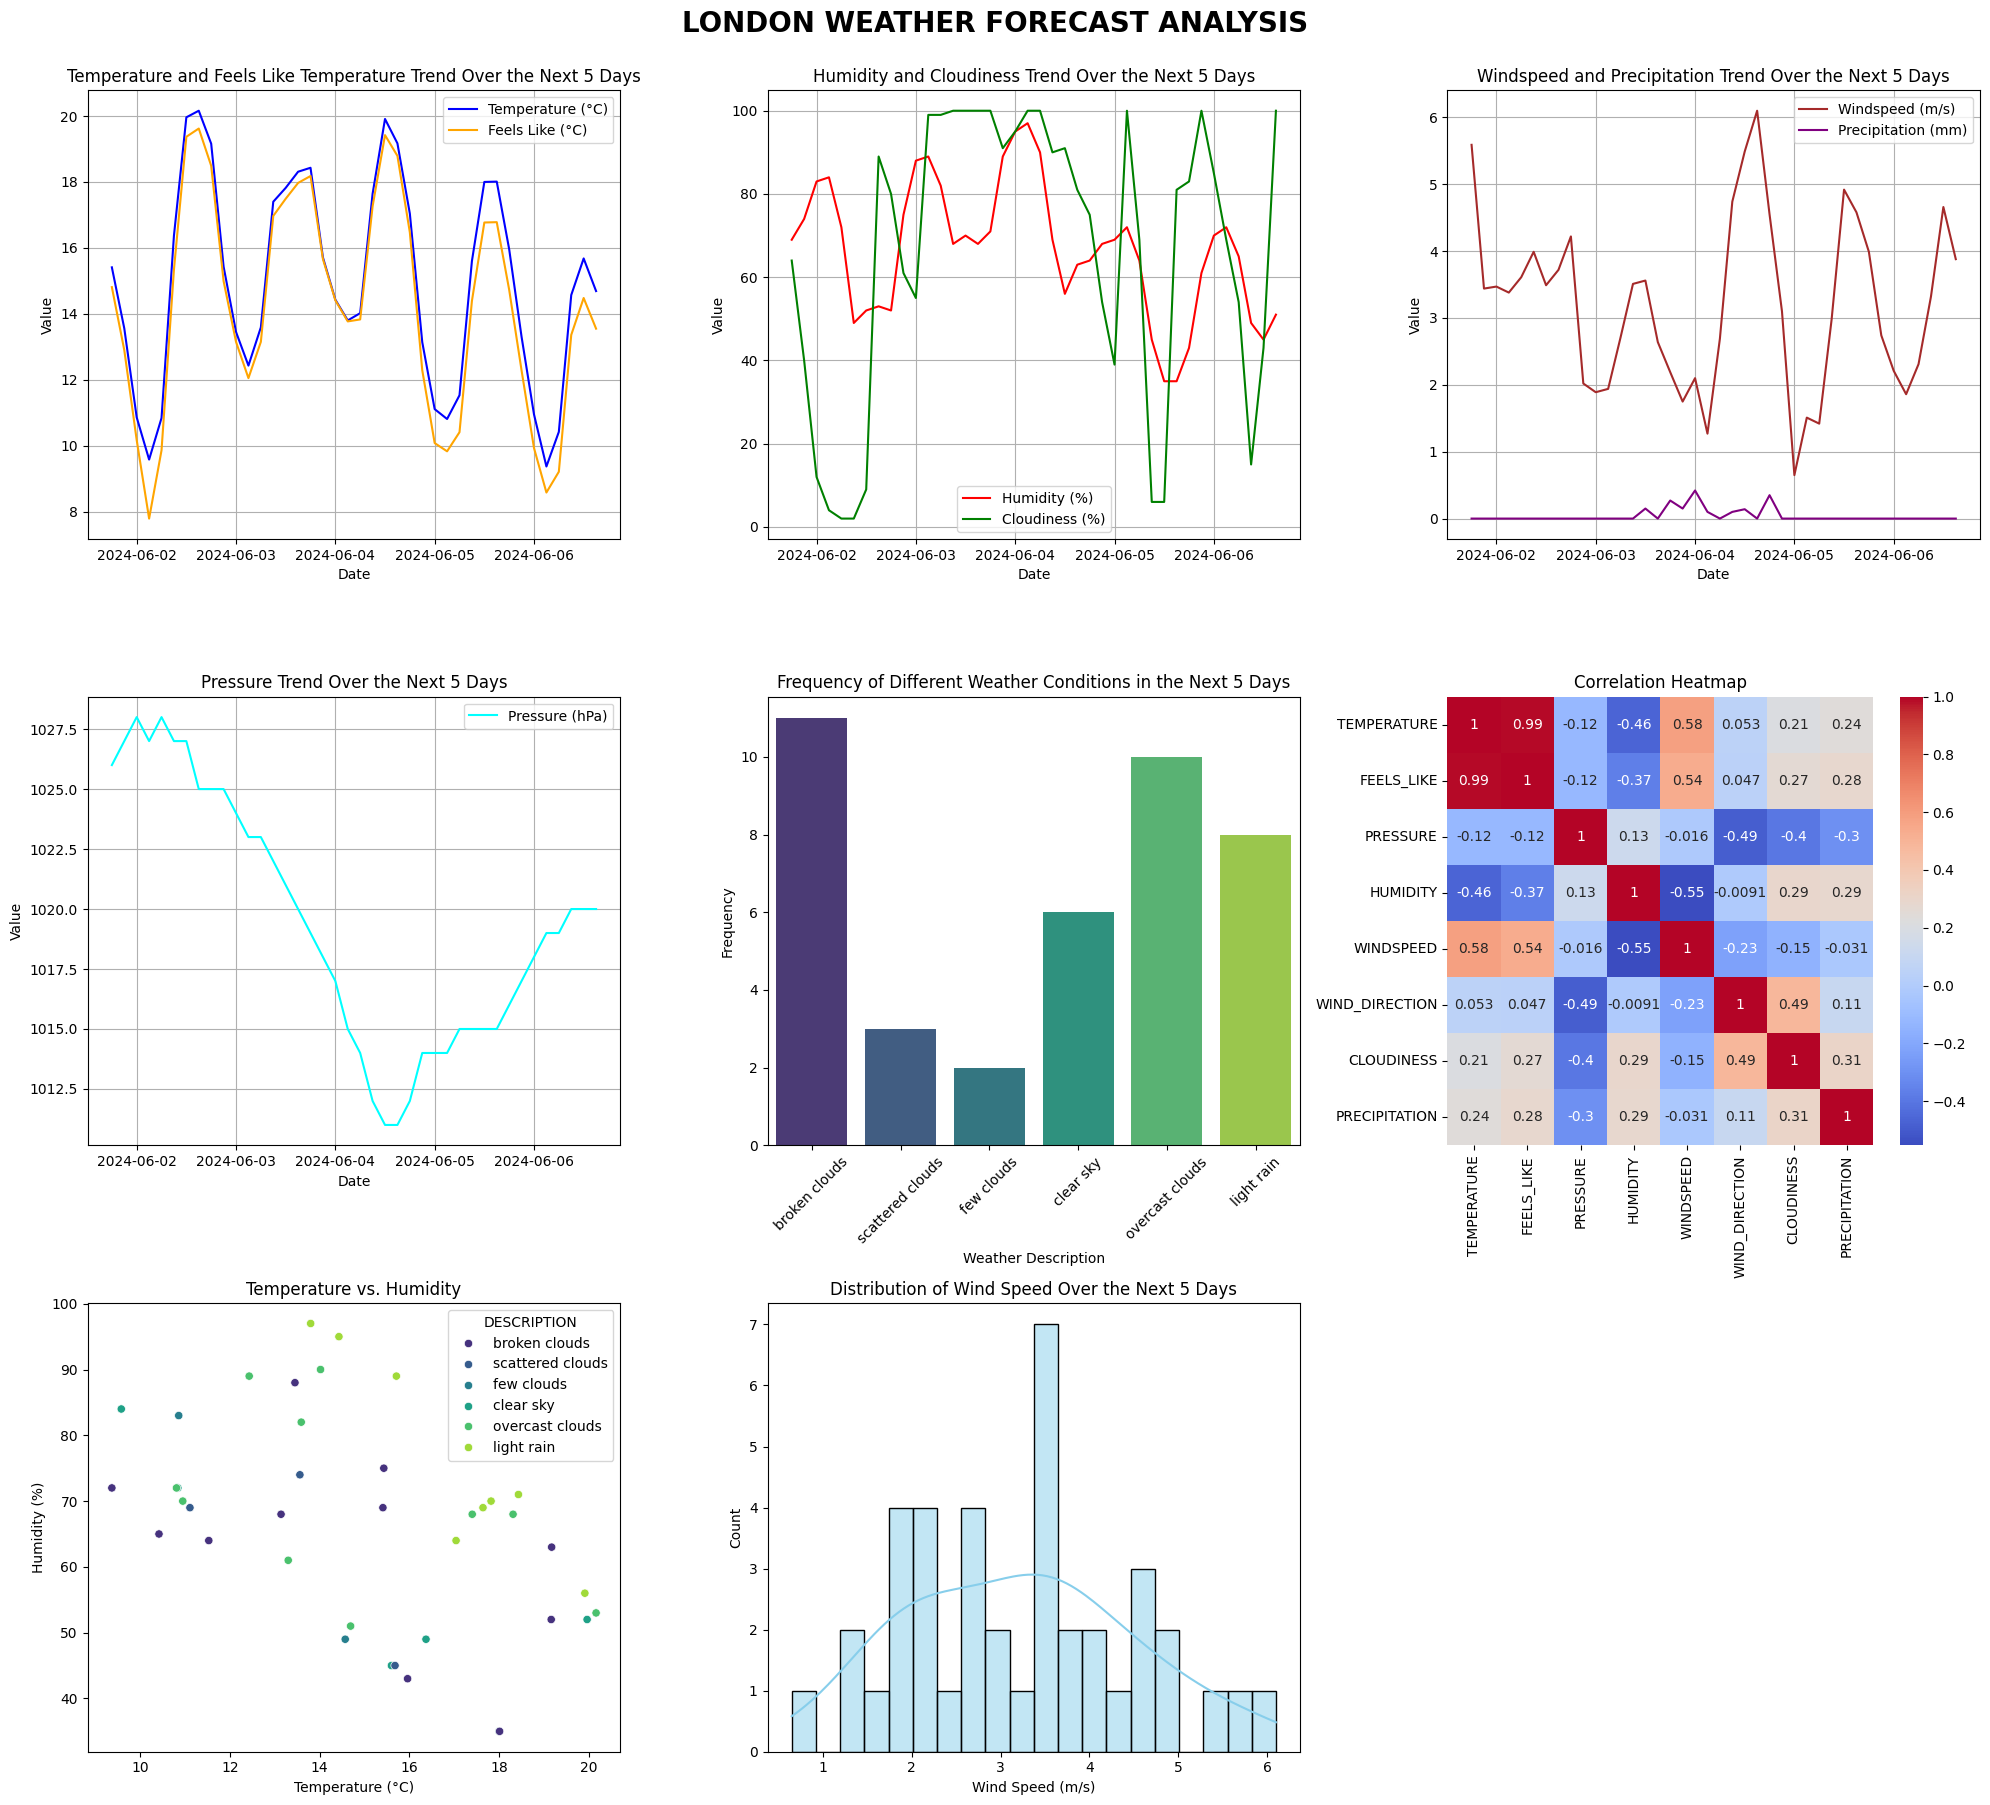

In [132]:


# Create a blank canvas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
fig.suptitle('LONDON WEATHER FORECAST ANALYSIS', fontsize=20, fontweight='bold', y=0.95)  # Adjust y value for spacing

# Plot Temperature and Feels Like Temperature
axes[0, 0].plot(data['DATE'], data['TEMPERATURE'], label='Temperature (°C)', color='blue', linestyle='-')
axes[0, 0].plot(data['DATE'], data['FEELS_LIKE'], label='Feels Like (°C)', color='orange', linestyle='-')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Value')
axes[0, 0].set_title('Temperature and Feels Like Temperature Trend Over the Next 5 Days')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot Humidity and Cloudiness
axes[0, 1].plot(data['DATE'], data['HUMIDITY'], label='Humidity (%)', color='red', linestyle='-')
axes[0, 1].plot(data['DATE'], data['CLOUDINESS'], label='Cloudiness (%)', color='green', linestyle='-')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Value')
axes[0, 1].set_title('Humidity and Cloudiness Trend Over the Next 5 Days')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot Windspeed and Precipitation
axes[0, 2].plot(data['DATE'], data['WINDSPEED'], label='Windspeed (m/s)', color='brown', linestyle='-')
axes[0, 2].plot(data['DATE'], data['PRECIPITATION'], label='Precipitation (mm)', color='purple', linestyle='-')
axes[0, 2].set_xlabel('Date')
axes[0, 2].set_ylabel('Value')
axes[0, 2].set_title('Windspeed and Precipitation Trend Over the Next 5 Days')
axes[0, 2].legend()
axes[0, 2].grid(True)

# Plot Pressure
axes[1, 0].plot(data['DATE'], data['PRESSURE'], label='Pressure (hPa)', color='cyan', linestyle='-')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Value')
axes[1, 0].set_title('Pressure Trend Over the Next 5 Days')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot frequency of different weather conditions
sns.countplot(data=data, x='DESCRIPTION', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_xlabel('Weather Description')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Frequency of Different Weather Conditions in the Next 5 Days')
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot correlation heatmap
numeric_data = data[['TEMPERATURE', 'FEELS_LIKE', 'PRESSURE', 'HUMIDITY', 'WINDSPEED', 'WIND_DIRECTION', 'CLOUDINESS', 'PRECIPITATION']]
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1, 2])
axes[1, 2].set_title('Correlation Heatmap')

# Plot Temperature vs humidity
sns.scatterplot(data=data, x='TEMPERATURE', y='HUMIDITY', hue='DESCRIPTION', palette='viridis', ax=axes[2, 0])
axes[2, 0].set_xlabel('Temperature (°C)')
axes[2, 0].set_ylabel('Humidity (%)')
axes[2, 0].set_title('Temperature vs. Humidity')

# Plot Wind Speed Distribution
sns.histplot(data['WINDSPEED'], bins=20, kde=True, color='skyblue', ax=axes[2, 1])
axes[2, 1].set_xlabel('Wind Speed (m/s)')
axes[2, 1].set_title('Distribution of Wind Speed Over the Next 5 Days')

# Hide the last subplot
fig.delaxes(axes[2, 2])

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust rect to accommodate suptitle

# Save the image
plt.savefig('analysis.png')

# Show the plot
plt.show()


In [118]:

# Plot Average Daily Temperature
# daily_avg_temp = data.groupby('DATE')['TEMPERATURE'].mean().reset_index()
# sns.barplot(data=daily_avg_temp, x='DATE', y='TEMPERATURE', palette='viridis', ax=axes[2, 2])
# axes[2, 2].set_xlabel('Date')
# axes[2, 2].set_ylabel('Average Temperature (°C)')
# axes[2, 2].set_title('Average Daily Temperature Over the Next 5 Days')